# Project: Titanic - Machine Learning from Disaster

# Table of Contents
* [1. Introduction] (#introduction)
* [2. Loading the Data] (#loading-data)
* [3. Exploratory Data Analysis (EDA)] (#eda)
* [4. Feature Engineering & Data Wrangling] (#fe-dw)
* [5. Model Training] (#model-training)

## 1. Introduce
## 2. Loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('./data/train.csv', index_col = 'PassengerId')
test_df = pd.read_csv('./data/test.csv', index_col = 'PassengerId')

In [3]:
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [4]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### Note: 
- SibSp: siblings/spouses aboard the Titanic
- Parch: parent/children aboard the Titanic
- Ticket: ticket number
- Cabin: cabin number

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


- categorical: Survived, Sex, Embarked, Pclass, SibSp, Parch
- numerical: Age, Fare
- mix types of data: Ticket, Cabin
- contain error/typo: Name
- blank or null: Cabin > Age > Embarked
- various data types: string, int, float

In [7]:
train_df['Survived'] = train_df['Survived'].astype('category')

In [8]:
features = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

In [9]:
def convert_cate(df, features):
    for ft in features:
        df[ft] = df[ft].astype('category')
        
convert_cate(train_df, features)
convert_cate(test_df, features)

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [11]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [12]:
train_df.describe(include = ['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


## 3. Exploratory Data Analysis (EDA)

### Correlating Categorical Features
Categorical: Survived, Sex, Embarked, Pclass, SibSp, Parch

### Target Variable: Survived

In [13]:
train_df['Survived'].value_counts().to_frame()

,Survived
0,549
1,342


In [14]:
train_df['Survived'].value_counts(normalize = True).to_frame()

,Survived
0,0.616162
1,0.383838


### Sex

In [15]:
train_df['Sex'].value_counts().to_frame()

,Sex
male,577
female,314


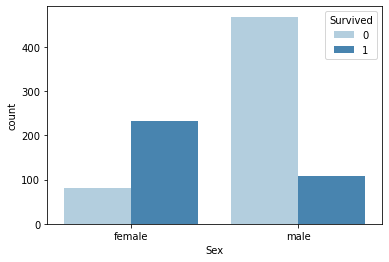

In [16]:
sns.countplot(data = train_df, x = 'Sex', hue = 'Survived', palette = 'Blues');

* Remaining Categorical Feature Columns

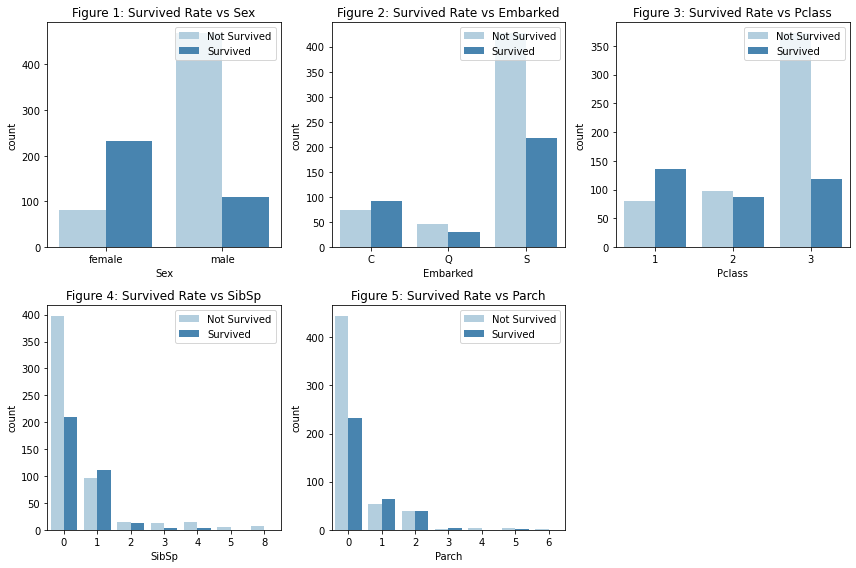

In [17]:
n_rows = 2
n_cols = 3
fig, ax = plt.subplots(n_rows, n_cols, figsize = (12, 8))
for r in range(n_rows):
    for c in range(n_cols):
        i = r*n_cols + c #index to loop through list 'cols'
        if i < len(features):
            ax_i = ax[r,c]
            sns.countplot(data = train_df, x = features[i], hue = 'Survived', palette = 'Blues', ax = ax_i)
            ax_i.set_title(f"Figure {i+1}: Survived Rate vs {features[i]}")
            ax_i.legend(title = '', loc = 'upper right', labels = ['Not Survived', 'Survived'])
ax.flat[-1].set_visible(False) #remove the last subplot
plt.tight_layout()
plt.show()

### Observation
* Survived Rate:
    * Fig 1: Female survival rate > male
    * Fig 2: Most people embarked on Southampton, and also had the highest people not survived 
    * Fig 3: 1st class higher survival rate
    * Fig 4: People going with 0 SibSp are mostly not survived, the number of passenger with 1-2 family members had a better chance of survival
    * Fig 5: People going with 0 Parch are mostly not survived

### 3.2 EDA for Numerical Features
* Numerical Features: (continuous) Age, Fare

### Age

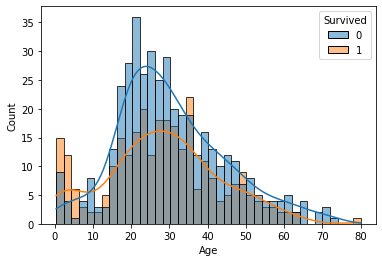

In [18]:
sns.histplot(data = train_df, x = 'Age',hue = 'Survived', bins = 40, kde = True);

### Fare

In [19]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

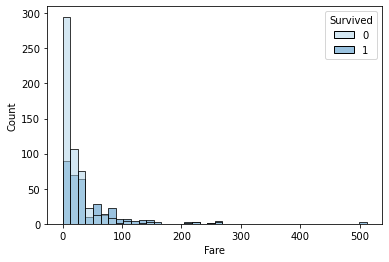

In [20]:
sns.histplot(data = train_df, x = 'Fare', hue = 'Survived', bins = 40, palette = 'Blues');

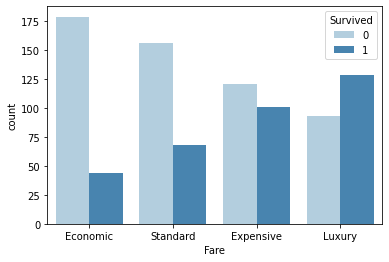

In [21]:
#To name for 0-25% quartile, 25-50, 50-75, 75-100
fare_categories = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartile_data = pd.qcut(train_df['Fare'], 4, labels = fare_categories)

sns.countplot(x = quartile_data, hue = train_df['Survived'], palette = 'Blues');

* Distribution of Fare
    * Fare doesn't follow a normal distribution and has a huge spike at the price range `[0-100$]`
    * The distribution is skewed to the left with `75$` of the fare paid under `$31` and a max paid fare of `$512`
* Quartile plot:
    * Passenger with Luxury & Expensive Fare will have more chance to survive
    
## 4. Feature Engineering & Data Wrangling

## 4.1 Feature Engineering

### Name
- Regular Expression

In [22]:
train_df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [23]:
import re   #regular expression
def extract_title(name):
    p = re.compile(r',([\w\s]+)\.')
    return p.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))

In [24]:
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [25]:
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))

In [26]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [27]:
def group_title(title):
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    elif title == 'Ms':
        return 'Miss'
    else:
        return 'Others'
train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

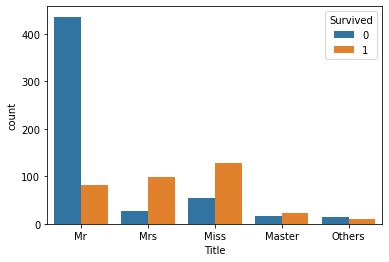

In [28]:
sns.countplot(data = train_df, x = 'Title', hue = 'Survived');

### Family
- `SibSp`, `Parch`

In [29]:
train_df['Family_size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1

In [30]:
test_df['Family_size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

In [31]:
train_df['Family_cat'] = pd.cut(train_df['Family_size'], bins = [0,1,4,6,20], labels = ['Solo', 'Small', 'Medium', 'Large']) #(0,1], (1,4], (4,6] 

In [32]:
test_df['Family_cat'] = pd.cut(test_df['Family_size'], bins = [0,1,4,6,20], labels = ['Solo', 'Small', 'Medium', 'Large']) #(0,1], (1,4], (4,6] 

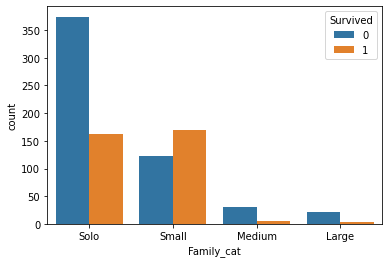

In [33]:
sns.countplot(data = train_df, x = 'Family_cat', hue = 'Survived');

## 4.2 Data Wrangling

In [34]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_cat']
feature_cols = num_features + cat_features
feature_cols

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_cat']

In [35]:
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f'{col} has {missing_count*100/n_rows:.2f} missing values')

display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Age has 19.87 missing values
Embarked has 0.22 missing values
Age has 20.57 missing values
Fare has 0.24 missing values


### Filling missing values
#### Age
- Filling missing values with `median` of whole dataset

In [36]:
age_by_sex_pclass = train_df.groupby(['Sex','Pclass']).median()['Age']
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [37]:
# Filling the missing values in Age with the medians of Sex and Pclass groups
train_df['Age'] = train_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [38]:
test_df['Age'] = test_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [39]:
x = train_df[feature_cols]
y = train_df['Survived']

In [40]:
x_test = test_df[feature_cols]

In [41]:
# preprocessing pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])
cat_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown = 'ignore'))
])

In [42]:
preprocessor = ColumnTransformer(transformers = [
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [43]:
preprocessor.fit(x)  

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_cat'])])

In [44]:
x = preprocessor.transform(x)  # x -> x_train, x_val
x_test = preprocessor.transform(x_test)

## 5. Model Training

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)

In [48]:
x_train.shape, x_val.shape

((712, 19), (179, 19))

In [50]:
x_test.shape

(418, 19)

In [80]:
# binary classification
from sklearn.preprocessing import PolynomialFeatures
# sklearn model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

In [67]:
log_reg = LogisticRegression(solver = 'liblinear', max_iter = 1000)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [68]:
log_reg.score(x_val, y_val)

0.8491620111731844

In [69]:
y_pred = log_reg.predict(x_val)

In [70]:
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.819672131147541, 0.7575757575757576)

In [71]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       113
           1       0.82      0.76      0.79        66

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



- y = ax1 + bx2 + bias -> y = ax1^2 + bx^2 + c x1*x2 + bias

In [74]:
poly = PolynomialFeatures(degree = 2)
poly_features_x_train = poly.fit_transform(x_train)
poly_features_x_val = poly.transform(x_val)

In [76]:
poly_log_reg = LogisticRegression(solver = 'liblinear', max_iter = 1000)
poly_log_reg.fit(poly_features_x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [79]:
poly_log_reg.score(poly_features_x_val, y_val)

0.8268156424581006

In [90]:
# Decision Tree
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 2022)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2022)

In [92]:
decision_tree.score(x_val, y_val)

0.8324022346368715

## 5.1 Cross-validation

In [94]:
from sklearn.model_selection import cross_val_score

In [107]:
log_reg_cv = LogisticRegression(solver = 'liblinear', max_iter = 1000)
dt_cv = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, random_state = 2023)

lr_scores = cross_val_score(log_reg_cv, x, y, scoring = 'accuracy', cv = 5)

In [108]:
lr_scores.mean(), lr_scores.std()

(0.826031008725127, 0.020466357172416235)

In [109]:
dt_scores = cross_val_score(dt_cv, x, y, scoring = 'accuracy', cv = 5)

In [110]:
dt_scores.mean(), dt_scores.std()

(0.8058690603226415, 0.01719257924007743)

## 5.2 Baseline Model Comparision

In [119]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
seed = 2023
models = [
    LinearSVC(max_iter = 12000, random_state = seed),
    SVC(random_state = seed),
    KNeighborsClassifier(metric = 'minkowski', p=2),
    LogisticRegression(solver = 'liblinear', max_iter = 1000),
    DecisionTreeClassifier(random_state = seed),
    RandomForestClassifier(random_state = seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(eval_metric = 'logloss', random_state = seed)
]

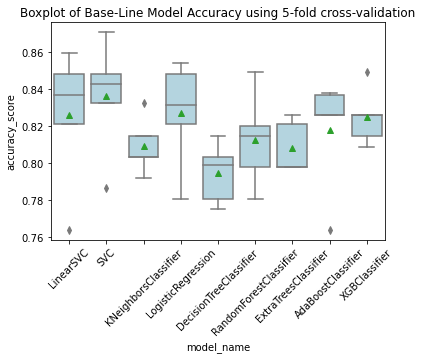

,Mean,Standard Deviation
model_name,,
SVC,0.836143,0.031097
LogisticRegression,0.827167,0.028974
LinearSVC,0.826044,0.037442
XGBClassifier,0.824889,0.015407
AdaBoostClassifier,0.818160,0.030812
RandomForestClassifier,0.812529,0.025614
KNeighborsClassifier,0.809177,0.015221
ExtraTreesClassifier,0.808066,0.014216
DecisionTreeClassifier,0.794608,0.016252


In [125]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(models, x, y, metrics, cv = 5, plot_results = False):
    #define K-fold
    kfold = StratifiedKFold(cv, shuffle = True, random_state = seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, x, y, scoring = metrics, cv = kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
        
    cv_df = pd.DataFrame(entries, columns = ['model_name', 'fold_id', 'accuracy_score'])
    if plot_results:
        sns.boxplot(x = 'model_name', y = 'accuracy_score', data = cv_df, color = 'lightblue', showmeans = True)
        plt.title('Boxplot of Base-Line Model Accuracy using 5-fold cross-validation')
        plt.xticks(rotation = 45)
        plt.show()
    
    # Summary result
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()
    
    baseline_results = pd.concat([mean, std], axis = 1, ignore_index = True)
    baseline_results.columns = ['Mean', 'Standard Deviation' ]
    
    # Sort by accuracy
    baseline_results.sort_values(by = ['Mean'], ascending = False, inplace = True)
    return baseline_results
    
generate_baseline_results(models, x, y, metrics = 'accuracy', cv =5, plot_results = True)